# MNIST Handwritten Digits Dataset
The data set contains images of hand-written digits: 10 classes where each class refers to a digit.

Preprocessing programs made available by NIST were used to extract normalized bitmaps of handwritten digits from a preprinted form. 30 contributed to this training set. 32x32 bitmaps are divided into nonoverlapping blocks of 4x4 and the number of on pixels are counted in each block. This generates an input matrix of 8x8 where each element is an integer in the range 0..16. This reduces dimensionality and gives invariance to small distortions.

For info on NIST preprocessing routines, see M. D. Garris, J. L. Blue, G. T. Candela, D. L. Dimmick, J. Geist, P. J. Grother, S. A. Janet, and C. L. Wilson, NIST Form-Based Handprint Recognition System, NISTIR 5469, 1994.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv('/content/mnist.csv')
df.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [38]:
df.shape

(1797, 65)

In [39]:
df.label.value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: label, dtype: int64

<Axes: xlabel='label', ylabel='count'>

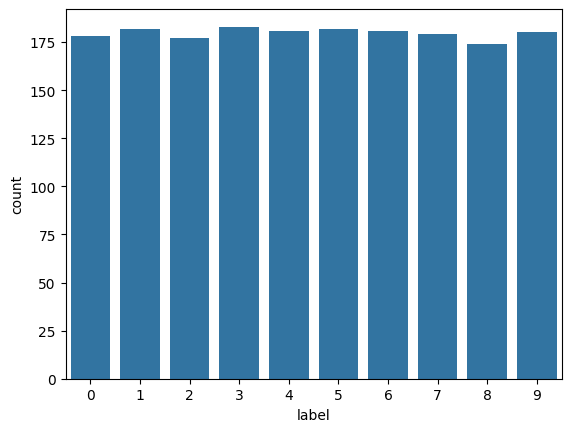

In [40]:
sns.countplot(data=df,x='label')

In [41]:
X=df.drop('label',axis=1)
y=df['label']

In [42]:
idx=np.random.randint(0,1796,9)
print(idx)

[1482 1732   74 1665  559  928 1066  814 1579]


7
[[ 0.  0.  4. 10. 15. 16.  4.  0.]
 [ 0.  0. 13. 14.  9. 16.  3.  0.]
 [ 0.  0.  2.  1.  5. 15.  0.  0.]
 [ 0.  0.  3.  4. 13. 14.  2.  0.]
 [ 0.  5. 16. 16. 16. 16.  8.  0.]
 [ 0.  4.  9. 12. 14.  1.  0.  0.]
 [ 0.  0.  5. 15. 10.  0.  0.  0.]
 [ 0.  0.  6. 16.  4.  0.  0.  0.]]


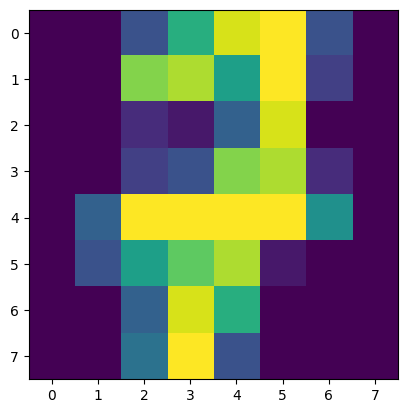

In [43]:
print(y[idx[4]])
print(np.reshape(X.values[idx[4]],(8,8)))
img=np.reshape(X.values[idx[4]],(8,8))
plt.imshow(img)

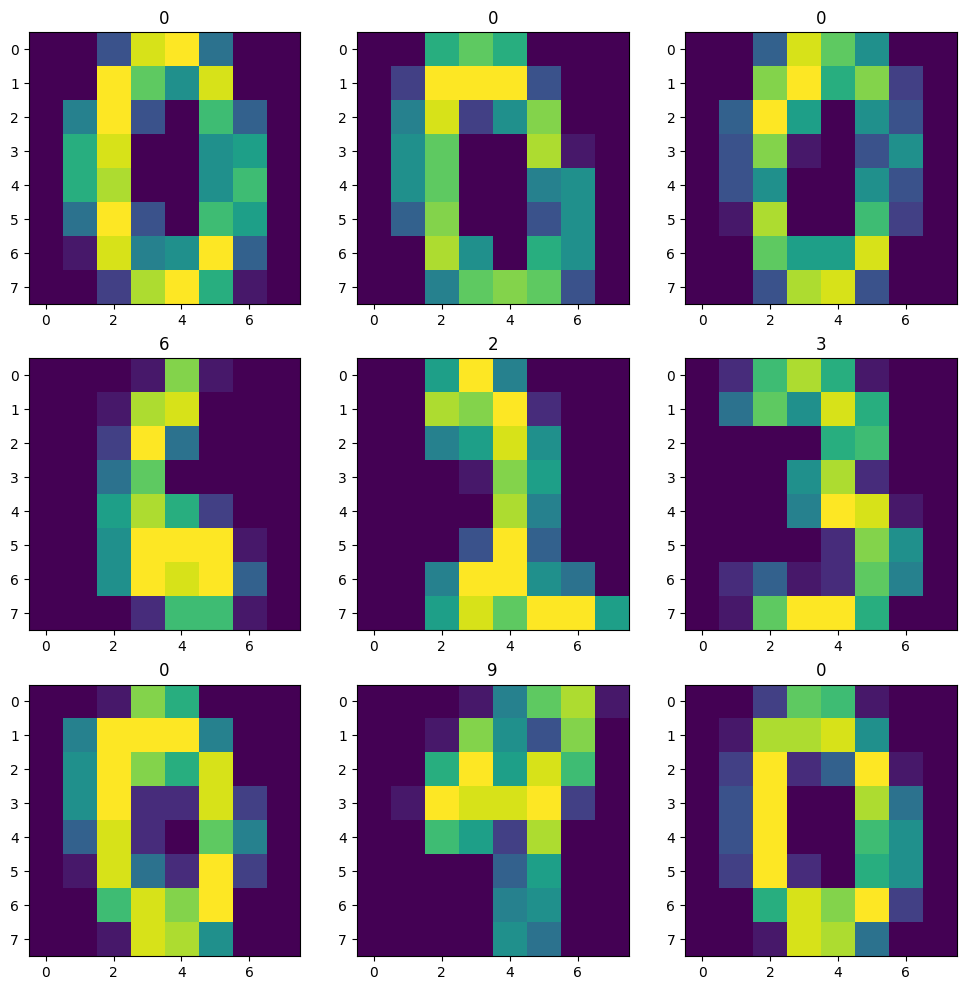

In [44]:
plt.figure(figsize=(12,12))
idx=np.random.randint(0,1796,9)

for i in range(len(idx)):
  plt.subplot(3,3,i+1)
  plt.title(y[idx[i]])
  img_grid=np.reshape(X.values[idx[i]],(8,8))
  plt.imshow(img_grid)

# Test Train Split

In [45]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25,random_state=0)

In [46]:
X_train.head()

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_54,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63
372,0.0,3.0,13.0,16.0,9.0,0.0,0.0,0.0,0.0,10.0,...,9.0,1.0,0.0,2.0,16.0,16.0,14.0,12.0,9.0,1.0
1443,0.0,0.0,1.0,14.0,13.0,4.0,0.0,0.0,0.0,3.0,...,6.0,0.0,0.0,0.0,0.0,9.0,14.0,13.0,1.0,0.0
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
211,0.0,0.0,8.0,16.0,13.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,9.0,0.0,0.0,0.0,0.0
632,0.0,0.0,1.0,13.0,7.0,0.0,0.0,0.0,0.0,1.0,...,4.0,2.0,0.0,0.0,1.0,15.0,16.0,15.0,13.0,15.0


# Training

In [47]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Prediction

In [48]:
y_test_predict=classifier.predict(X_test)

# Measuring Performance

**Accuracy**

In [49]:
from sklearn  import metrics
metrics.accuracy_score(y_test_predict,y_test)

0.9511111111111111

# Confusion Metrics

In [50]:
# print the confusion matrix
con_metric= metrics.confusion_matrix(y_test_predict,y_test)
print(con_metric)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  1  0  0  0  1  0  3  0]
 [ 0  0 40  0  0  0  0  0  1  0]
 [ 0  0  3 43  0  0  0  1  0  0]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  1]
 [ 0  0  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  1  0  0 46  0  0]
 [ 0  2  0  1  0  0  0  0 43  1]
 [ 0  1  0  1  0  2  0  0  1 45]]


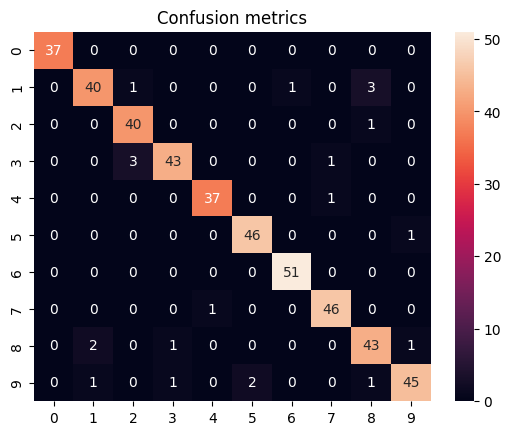

In [51]:
#ploting heatmap for confusion matrix
sns.heatmap(con_metric,annot=True,fmt='d')
plt.title('Confusion metrics')
plt.show()

# Classification Report

In [52]:
print(metrics.classification_report(y_test_predict,y_test))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      0.89      0.91        45
           2       0.91      0.98      0.94        41
           3       0.96      0.91      0.93        47
           4       0.97      0.97      0.97        38
           5       0.96      0.98      0.97        47
           6       0.98      1.00      0.99        51
           7       0.96      0.98      0.97        47
           8       0.90      0.91      0.91        47
           9       0.96      0.90      0.93        50

    accuracy                           0.95       450
   macro avg       0.95      0.95      0.95       450
weighted avg       0.95      0.95      0.95       450



# Decision Tree Model

In [53]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)
Y_test_predict=classifier.predict(X_test)
metrics.accuracy_score(y_test_predict,y_test)

0.9511111111111111